In [1]:
import tensorflow as tf
from tensorflow.python import keras
from sklearn.model_selection import train_test_split

2023-06-26 13:48:12.742221: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-26 13:48:14.136847: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import json
import numpy as np

def load_data(dataset_path):
    with open(dataset_path,'r') as fp:
        data=json.load(fp)

    inputs=np.array(data['mfcc'])
    targets=np.array(data['labels'])

    return inputs,targets

In [3]:
inputs,targets=load_data('data_project.json')

In [4]:
targets

array([0, 0, 0, ..., 5, 5, 5])

In [5]:
input_train,input_test,target_train,target_test=train_test_split(inputs,targets,test_size=0.3)

In [6]:
inputs.shape

(5038, 259, 13)

In [7]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(6,activation='softmax')
])

2023-06-26 13:48:25.894469: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-26 13:48:26.004328: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-26 13:48:26.004620: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3367)              0         
                                                                 
 dense (Dense)               (None, 512)               1724416   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 1,872,582
Trainable params: 1,872,582
Non-trainable params: 0
_________________________________________________________________


In [10]:
history=model.fit(input_train,target_train,validation_data=(input_test,target_test),epochs=100,batch_size=32)

2023-06-26 13:48:27.239459: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47488168 exceeds 10% of free system memory.


Epoch 1/100


2023-06-26 13:48:27.339598: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47488168 exceeds 10% of free system memory.
2023-06-26 13:48:28.625560: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x1fc8f6c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-26 13:48:28.625599: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-06-26 13:48:28.671114: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-26 13:48:28.907781: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-06-26 13:48:29.177875: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


111/111 [==============================] - 3s 4ms/step - loss: 14.1411 - accuracy: 0.3880 - val_loss: 3.3342 - val_accuracy: 0.4676
Epoch 2/100
111/111 [==============================] - 0s 3ms/step - loss: 3.5331 - accuracy: 0.4801 - val_loss: 3.5339 - val_accuracy: 0.4782
Epoch 3/100
111/111 [==============================] - 0s 3ms/step - loss: 2.0087 - accuracy: 0.5652 - val_loss: 2.6209 - val_accuracy: 0.5126
Epoch 4/100
111/111 [==============================] - 0s 3ms/step - loss: 1.4084 - accuracy: 0.6001 - val_loss: 2.0319 - val_accuracy: 0.4881
Epoch 5/100
111/111 [==============================] - 0s 3ms/step - loss: 1.1508 - accuracy: 0.6438 - val_loss: 1.5759 - val_accuracy: 0.5615
Epoch 6/100
111/111 [==============================] - 0s 3ms/step - loss: 0.9046 - accuracy: 0.6997 - val_loss: 1.5157 - val_accuracy: 0.5403
Epoch 7/100
111/111 [==============================] - 0s 3ms/step - loss: 0.7079 - accuracy: 0.7541 - val_loss: 1.5780 - val_accuracy: 0.5509
Epoch 8/10

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_accuracy_curves(history):
    history_plot=pd.DataFrame(history.history)

    plt.plot(history_plot['accuracy'],label='train_accuracy')
    plt.plot(history_plot['val_accuracy'],label='test_accuracy')
    plt.legend(['train_accuracy','test_accuracy'])
    plt.title("Accuracy curves")
    plt.xlabel("Epochs")

In [12]:
def plot_loss_curves(history):
    history_plot=pd.DataFrame(history.history)

    plt.plot(history_plot['loss'],label='train_loss')
    plt.plot(history_plot['val_loss'],label='test_loss')
    plt.legend(['train_loss','test_loss'])
    plt.title("Loss curves")
    plt.xlabel("Epochs")

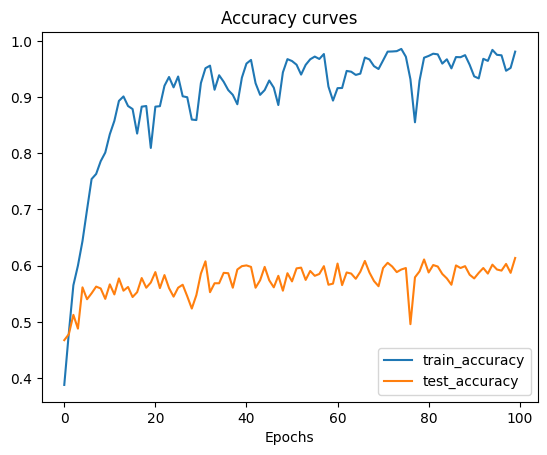

In [13]:
plot_accuracy_curves(history)

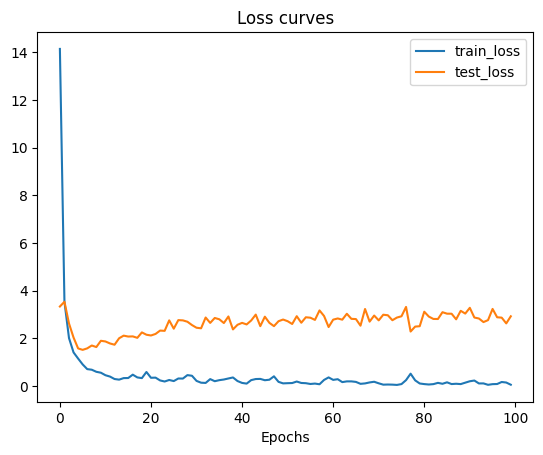

In [14]:
plot_loss_curves(history)

In [15]:
#Reducing neurons, applying dropout and L2 regularization to reduce overfitting

model2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),
    tf.keras.layers.Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.003)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.003)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.003)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(6,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history2=model.fit(input_train,target_train,validation_data=(input_test,target_test),epochs=100,batch_size=32)

Epoch 1/100


2023-06-26 13:49:00.485654: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47488168 exceeds 10% of free system memory.
2023-06-26 13:49:00.555612: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47488168 exceeds 10% of free system memory.


111/111 [==============================] - 1s 4ms/step - loss: 0.1398 - accuracy: 0.9586 - val_loss: 3.4247 - val_accuracy: 0.6012
Epoch 2/100
111/111 [==============================] - 0s 3ms/step - loss: 0.1220 - accuracy: 0.9606 - val_loss: 3.5038 - val_accuracy: 0.6058
Epoch 3/100
111/111 [==============================] - 0s 3ms/step - loss: 0.0718 - accuracy: 0.9770 - val_loss: 3.5227 - val_accuracy: 0.5985
Epoch 4/100
111/111 [==============================] - 0s 3ms/step - loss: 0.0862 - accuracy: 0.9708 - val_loss: 3.9182 - val_accuracy: 0.5985
Epoch 5/100
111/111 [==============================] - 0s 3ms/step - loss: 0.1404 - accuracy: 0.9611 - val_loss: 3.9842 - val_accuracy: 0.5655
Epoch 6/100
111/111 [==============================] - 0s 3ms/step - loss: 0.1787 - accuracy: 0.9458 - val_loss: 2.8661 - val_accuracy: 0.5860
Epoch 7/100
111/111 [==============================] - 0s 3ms/step - loss: 0.1057 - accuracy: 0.9708 - val_loss: 2.9705 - val_accuracy: 0.6045
Epoch 8/100

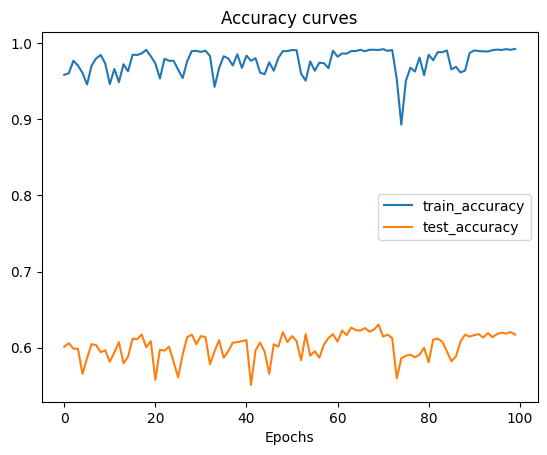

In [16]:
plot_accuracy_curves(history2)

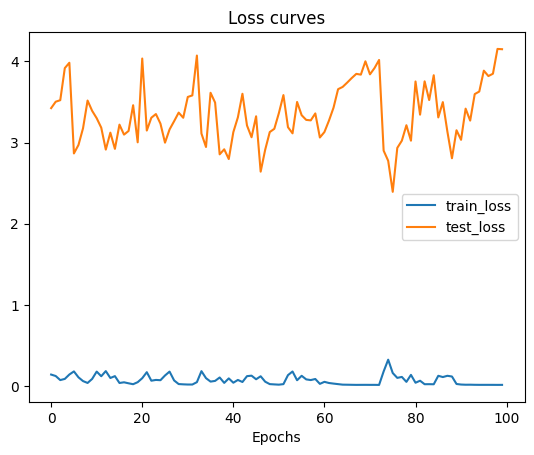

In [17]:
plot_loss_curves(history2)

# Building our CNN Model

In [18]:
def train_test_validation_split(test_size,validation_size):
    X_train,X_test,target_train,y_test=train_test_split(inputs,targets,test_size=test_size)
    X_train,X_validation,target_train,y_validation=train_test_split(X_train,target_train,test_size=validation_size)

    X_train=X_train[...,np.newaxis]
    X_test=X_test[...,np.newaxis]
    X_validation=X_validation[...,np.newaxis]

    return X_train,X_test,X_validation,target_train,y_test,y_validation

In [19]:
X_train,X_test,X_validation,target_train,y_test,y_validation=train_test_validation_split(0.25,0.2)

In [20]:
X_train.shape

(3022, 259, 13, 1)

In [21]:
def build_model(input_shape):
    model=tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
        tf.keras.layers.MaxPool2D((3,3),strides=(2,2),padding='same'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(16,(2,2),activation='relu'),
        tf.keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(6,activation='softmax')
    ])

    return model

In [22]:
input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])
cnn_model=build_model(input_shape)
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 257, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 129, 6, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 129, 6, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 5, 16)        2064      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 3, 16)        0         
 2D)                                                             
                                                      

In [36]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [37]:
cnn_history=cnn_model.fit(X_train,target_train,validation_data=(X_validation,y_validation),epochs=100,batch_size=32)

Epoch 1/100
95/95 [==============================] - 2s 6ms/step - loss: 1.3070 - accuracy: 0.7459 - val_loss: 16.2775 - val_accuracy: 0.1336
Epoch 2/100
95/95 [==============================] - 0s 5ms/step - loss: 0.7294 - accuracy: 0.8074 - val_loss: 7.4185 - val_accuracy: 0.1336
Epoch 3/100
95/95 [==============================] - 0s 5ms/step - loss: 0.4513 - accuracy: 0.8620 - val_loss: 5.6851 - val_accuracy: 0.1336
Epoch 4/100
95/95 [==============================] - 0s 5ms/step - loss: 0.3687 - accuracy: 0.8822 - val_loss: 4.9375 - val_accuracy: 0.1336
Epoch 5/100
95/95 [==============================] - 0s 4ms/step - loss: 0.3207 - accuracy: 0.8925 - val_loss: 4.5915 - val_accuracy: 0.2341
Epoch 6/100
95/95 [==============================] - 0s 4ms/step - loss: 0.2591 - accuracy: 0.9150 - val_loss: 4.9975 - val_accuracy: 0.2011
Epoch 7/100
95/95 [==============================] - 0s 5ms/step - loss: 0.2249 - accuracy: 0.9196 - val_loss: 4.4580 - val_accuracy: 0.2315
Epoch 8/100


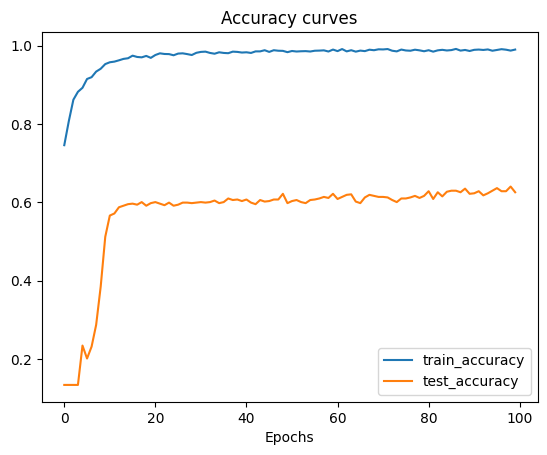

In [38]:
plot_accuracy_curves(cnn_history)

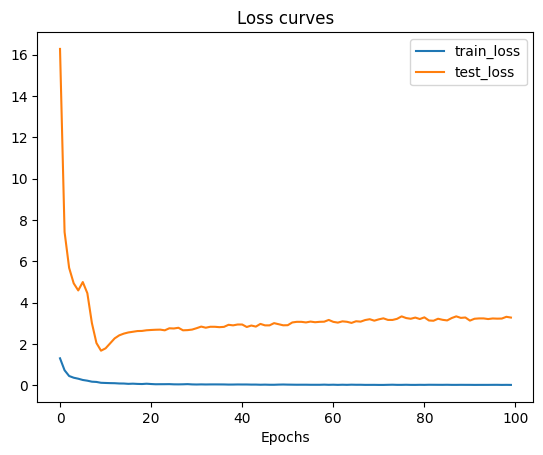

In [39]:
plot_loss_curves(cnn_history)

In [40]:
test_error,test_accuracy=cnn_model.evaluate(X_test,y_test,verbose=1)

40/40 [==============================] - 0s 2ms/step - loss: 3.0843 - accuracy: 0.6524


In [41]:
test_accuracy

0.6523809432983398

In [29]:
input_shape

(259, 13, 1)

In [30]:
import tensorflow_hub as hub

IMAGE_SHAPE=(224, 224)
def create_pretrained_model(model_url,num_classes,input_shape):
    features_extractor=hub.KerasLayer(model_url,trainable=False,
                                    name="feature_extractor",input_shape=IMAGE_SHAPE+(3,),dtype=tf.float32)
    model=tf.keras.Sequential([
        features_extractor,
        tf.keras.layers.Dense(num_classes,activation="softmax",name="output_layer")
    ])
    return model

In [31]:
X_train = tf.cast(X_train,tf.float32)
X_test = tf.cast(X_test,tf.float32)
X_validation = tf.cast(X_validation,tf.float32)

In [32]:
resnet_url="https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/5"
resnet_model=create_pretrained_model(resnet_url,6,input_shape)

In [33]:
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor (KerasLay  (None, 2048)             58331648  
 er)                                                             
                                                                 
 output_layer (Dense)        (None, 6)                 12294     
                                                                 
Total params: 58,343,942
Trainable params: 12,294
Non-trainable params: 58,331,648
_________________________________________________________________


In [34]:
resnet_model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
X_train=X_train/255.
X_test=X_test/255.
X_validation=X_validation/255.

X_train=tf.reshape(X_train,[-1,224,224,3])
X_test=tf.reshape(X_test,[-1,224,224,3])
X_validation=tf.reshape(X_validation,[-1,224,224,3])

InvalidArgumentError: {{function_node __wrapped__Reshape_device_/job:localhost/replica:0/task:0/device:GPU:0}} Input to reshape is a tensor with 10175074 values, but the requested shape requires a multiple of 150528 [Op:Reshape]

In [ ]:
resnet_history=resnet_model.fit(X_train,target_train,validation_data=(X_validation,y_validation),epochs=100,batch_size=32)

Epoch 1/100


ValueError: in user code:

    File "/home/soumik/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/soumik/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/soumik/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/soumik/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/soumik/miniconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/soumik/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_37" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 259, 13, 1)


In [ ]:
X_train.shape

TensorShape([3022, 259, 13, 1])

In [ ]:
input_shape

(259, 13, 1)